In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
# Note: Since the same api_keys file is used for multiple activities, it should be in the 
# folder one level below this notebook
import sys
sys.path.append('../')
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


627

In [3]:
print("Beginning Data Retrieval")
print("---------------------------------------------")

#Setup my dataframe
# City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
cities_df = pd.DataFrame({"City": cities})
cities_df["Lat"] = 0
cities_df["Lng"] = 0
cities_df["Max Temp"] = 0
cities_df["Humidity"] = 0
cities_df["Cloudiness"] = 0
cities_df["Wind Speed"] = 0
cities_df["Country"] = ""
cities_df["Date"] = ""

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

#loop through cities and populate dataframe as you go
#Error handling to skip cities not returning weather info
for index in range(len(cities_df)):
    city = cities_df.loc[index, 'City']
    response = requests.get(query_url + city).json()
    
    try:
        print(f"Processing Record {index} : {response['name']}")
        cities_df.loc[index, 'City'] = response['name']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        
    except (KeyError, IndexError):
        print(f"Missing result... skipping {city}.")



cities_df



Beginning Data Retrieval
---------------------------------------------
Processing Record 0 : Colac
Processing Record 1 : Kozhva
Processing Record 2 : Ushuaia
Processing Record 3 : Rikitea
Processing Record 4 : Butaritari
Processing Record 5 : Srednekolymsk
Processing Record 6 : Kapaa
Processing Record 7 : Bluff
Processing Record 8 : Egvekinot
Processing Record 9 : Bethel
Processing Record 10 : Faanui
Processing Record 11 : East London
Processing Record 12 : Urusha
Processing Record 13 : Broome
Processing Record 14 : Hilo
Processing Record 15 : Albany
Processing Record 16 : Half Moon Bay
Missing result... skipping saleaula.
Processing Record 18 : Yankton
Processing Record 19 : Ampanihy
Processing Record 20 : Port-Gentil
Processing Record 21 : Cherskiy
Processing Record 22 : West Memphis
Processing Record 23 : Rome
Processing Record 24 : Guerrero Negro
Processing Record 25 : Vågåmo
Processing Record 26 : Sur
Missing result... skipping nikolskoye-na-cheremshane.
Missing result... skipping

Processing Record 242 : Polonnaruwa
Processing Record 243 : Perote
Processing Record 244 : Chapais
Processing Record 245 : Korla
Processing Record 246 : Wukari
Processing Record 247 : Iquique
Processing Record 248 : Sechura
Processing Record 249 : Kendari
Processing Record 250 : Vardø
Missing result... skipping vaitupu.
Processing Record 252 : Linxia Chengguanzhen
Processing Record 253 : Shimoda
Processing Record 254 : Ilo
Processing Record 255 : Sabzawār
Processing Record 256 : Prymors'k
Processing Record 257 : Souillac
Processing Record 258 : Codrington
Processing Record 259 : Caucayá
Processing Record 260 : Kumul
Processing Record 261 : Schattdorf
Missing result... skipping hihifo.
Processing Record 263 : Vao
Processing Record 264 : Bathurst
Processing Record 265 : Moose Factory
Processing Record 266 : Kirensk
Processing Record 267 : Lālpur
Processing Record 268 : Shāhganj
Missing result... skipping buqayq.
Processing Record 270 : Christchurch
Processing Record 271 : Palmer
Processi

Processing Record 486 : Canutama
Processing Record 487 : Kutum
Missing result... skipping tumannyy.
Processing Record 489 : Jiayuguan City
Processing Record 490 : Eidfjord
Processing Record 491 : El Cobre
Processing Record 492 : Sena Madureira
Processing Record 493 : Amuntai
Processing Record 494 : Mana
Processing Record 495 : Ocampo
Processing Record 496 : Katsuura
Processing Record 497 : Port Keats
Processing Record 498 : Lüderitz
Processing Record 499 : Vila Franca do Campo
Processing Record 500 : Prattville
Processing Record 501 : Rosario
Processing Record 502 : Ostrovnoy
Processing Record 503 : Nouna
Processing Record 504 : Altay
Processing Record 505 : Mandalgovi
Processing Record 506 : Chesma
Processing Record 507 : Aginskoye
Missing result... skipping fevralsk.
Processing Record 509 : Rawson
Processing Record 510 : Honāvar
Processing Record 511 : Charleston
Processing Record 512 : Mujiayingzi
Processing Record 513 : Vestmanna
Processing Record 514 : Nishifukuma
Processing Recor

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Colac,-38.3333,143.5833,55.62,88,91,12.44,AU,1634960609
1,Kozhva,65.1073,57.0459,34.90,97,100,11.16,RU,1634960610
2,Ushuaia,-54.8000,-68.3000,38.86,93,75,32.21,AR,1634960608
3,Rikitea,-23.1203,-134.9692,74.16,84,7,19.75,PF,1634960550
4,Butaritari,3.0707,172.7902,82.51,75,88,17.90,KI,1634960611
...,...,...,...,...,...,...,...,...,...
622,Haimen,23.1935,116.6142,67.89,68,73,11.81,CN,1634960860
623,Belgrade,44.8040,20.4651,53.65,100,75,10.36,RS,1634960700
624,geresk,0.0000,0.0000,0.00,0,0,0.00,,
625,Amapá,1.0000,-52.0000,70.99,99,98,2.35,BR,1634960860


In [4]:
#Remove cities with missing data
clean_city_data = cities_df[(cities_df["Lat"] != 0)] 

#Remove cities with Humidity > 100
clean_city_data = clean_city_data[(cities_df["Humidity"] <= 100)]

clean_city_data


/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Colac,-38.3333,143.5833,55.62,88,91,12.44,AU,1634960609
1,Kozhva,65.1073,57.0459,34.90,97,100,11.16,RU,1634960610
2,Ushuaia,-54.8000,-68.3000,38.86,93,75,32.21,AR,1634960608
3,Rikitea,-23.1203,-134.9692,74.16,84,7,19.75,PF,1634960550
4,Butaritari,3.0707,172.7902,82.51,75,88,17.90,KI,1634960611
...,...,...,...,...,...,...,...,...,...
621,Khani,41.9563,42.9566,35.17,56,0,5.44,GE,1634960859
622,Haimen,23.1935,116.6142,67.89,68,73,11.81,CN,1634960860
623,Belgrade,44.8040,20.4651,53.65,100,75,10.36,RS,1634960700
625,Amapá,1.0000,-52.0000,70.99,99,98,2.35,BR,1634960860


In [5]:
#output clean city data to a csv file

clean_city_data.to_csv('../output_data/citydata.csv', index=False)


## Latitude vs. Temperature Plot

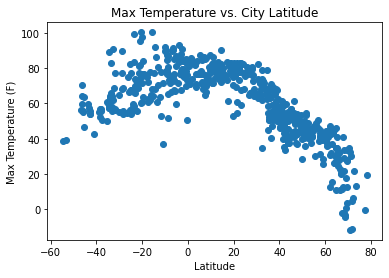

In [6]:
x_values = clean_city_data["Lat"].values
y_values = clean_city_data["Max Temp"].values

plt.scatter(x_values, y_values)
plt.title("Max Temperature vs. City Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig('../images/figure1.png')
plt.show()

In [7]:
# The Plot above is a scatter plot showing the relationship beween Temperature and Latitude
# The graph DOES NOT appear to show a linear relationship, likely this is due to south latitudes being negative

## Latitude vs. Humidity Plot

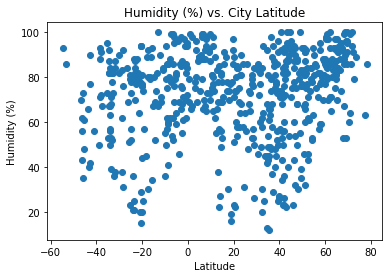

In [8]:
x_values = clean_city_data["Lat"].values
y_values = clean_city_data["Humidity"].values

plt.scatter(x_values, y_values)
plt.title("Humidity (%) vs. City Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig('../images/figure2.png')
plt.show()

In [9]:
# The Plot above is a scatter plot showing the relationship beween Humidity and Latitude
# The graph DOES NOT appear to show a linear relationship.

## Latitude vs. Cloudiness Plot

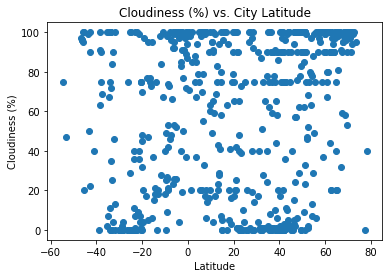

In [10]:
x_values = clean_city_data["Lat"].values
y_values = clean_city_data["Cloudiness"].values

plt.scatter(x_values, y_values)
plt.title("Cloudiness (%) vs. City Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig('../images/figure3.png')
plt.show()

In [11]:
# The Plot above is a scatter plot showing the relationship beween Cloudiness and Latitude
# The graph DOES NOT appear to show a linear relationship.

## Latitude vs. Wind Speed Plot

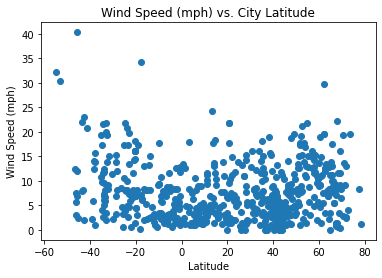

In [12]:
x_values = clean_city_data["Lat"].values
y_values = clean_city_data["Wind Speed"].values

plt.scatter(x_values, y_values)
plt.title("Wind Speed (mph) vs. City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig('../images/figure4.png')
plt.show()

In [13]:
# The Plot above is a scatter plot showing the relationship beween Wind Speed and Latitude
# The graph DOES NOT appear to show a linear relationship.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7981396444035319


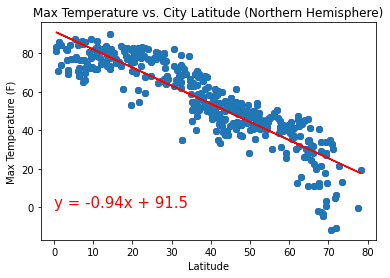

In [14]:
# Get subset of clean data for Northern Hemisphere

clean_data_north = cities_df[(cities_df["Lat"] > 0)] 

x_values = clean_data_north["Lat"].values
y_values = clean_data_north["Max Temp"].values

plt.scatter(x_values, y_values,color="blue")
plt.title("Max Temperature vs. City Latitude (Northern Hemisphere)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig('../images/figure5.png')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.32830746720094717


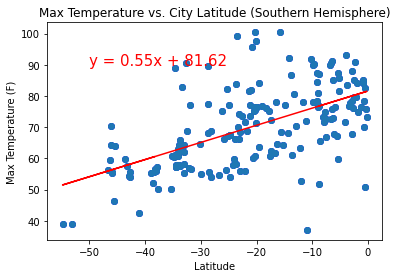

In [15]:
# Get subset of clean data for Northern Hemisphere

clean_data_south = cities_df[(cities_df["Lat"] < 0)] 

x_values = clean_data_south["Lat"].values
y_values = clean_data_south["Max Temp"].values

plt.scatter(x_values, y_values,color="blue")
plt.title("Max Temperature vs. City Latitude (Southern Hemisphere)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig('../images/figure6.png')

plt.show()

In [16]:
# The two Plots above are scatter plots showing the relationship beween Temperature and Latitude
# Since they are split between the northen and southern hemisphere there does seem to be a decent
# linear relationship with the southern having a negative correlation due to the negative latitudes

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02075697115003294


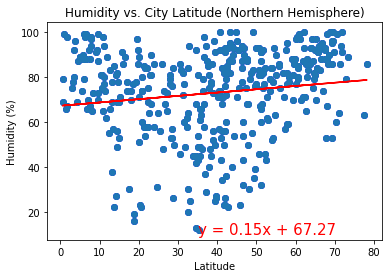

In [17]:
# Get subset of clean data for Northern Hemisphere

clean_data_north = cities_df[(cities_df["Lat"] > 0)] 

x_values = clean_data_north["Lat"].values
y_values = clean_data_north["Humidity"].values

plt.scatter(x_values, y_values,color="blue")
plt.title("Humidity vs. City Latitude (Northern Hemisphere)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig('../images/figure7.png')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03031634246326395


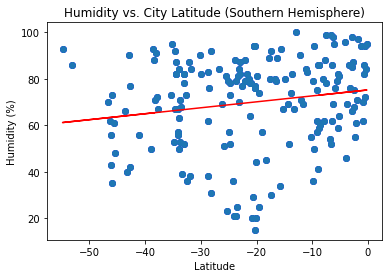

In [18]:
# Get subset of clean data for Southern Hemisphere

clean_data_south = cities_df[(cities_df["Lat"] < 0)] 

x_values = clean_data_south["Lat"].values
y_values = clean_data_south["Humidity"].values

plt.scatter(x_values, y_values,color="blue")
plt.title("Humidity vs. City Latitude (Southern Hemisphere)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,2),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig('../images/figure8.png')

plt.show()

In [19]:
# The two Plots above are scatter plots showing the relationship beween Humidity and Latitude
# Even after splitting the the hemispheres, the correlation between Humididty and Latitude appears to be very weak

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04286671179090728


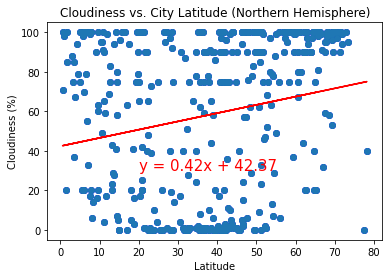

In [20]:
# Get subset of clean data for Northern Hemisphere

clean_data_north = cities_df[(cities_df["Lat"] > 0)] 

x_values = clean_data_north["Lat"].values
y_values = clean_data_north["Cloudiness"].values

plt.scatter(x_values, y_values,color="blue")
plt.title("Cloudiness vs. City Latitude (Northern Hemisphere)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig('../images/figure9.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.32830746720094717


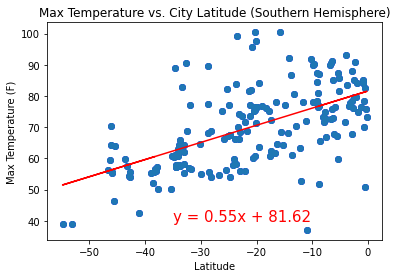

In [21]:
# Get subset of clean data for Southern Hemisphere

clean_data_south = cities_df[(cities_df["Lat"] < 0)] 

x_values = clean_data_south["Lat"].values
y_values = clean_data_south["Max Temp"].values

plt.scatter(x_values, y_values,color="blue")
plt.title("Max Temperature vs. City Latitude (Southern Hemisphere)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,40),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig('../images/figure10.png')

plt.show()

In [22]:
# The two Plots above are scatter plots showing the relationship beween Cloudiness and Latitude
# After splitting the data by hemisphere, a somewhat surprising result occured. While not particularly strong,
# the correlation in the southern hemisphere has a much higher r^2 value than the north. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.049305685635143606


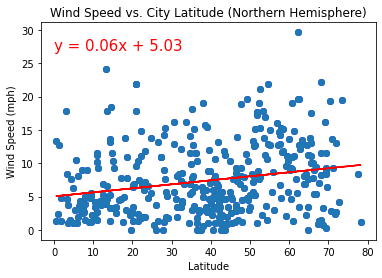

In [23]:
# Get subset of clean data for Northern Hemisphere

clean_data_north = cities_df[(cities_df["Lat"] > 0)] 

x_values = clean_data_north["Lat"].values
y_values = clean_data_north["Wind Speed"].values

plt.scatter(x_values, y_values,color="blue")
plt.title("Wind Speed vs. City Latitude (Northern Hemisphere)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,27),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig('../images/figure11.png')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.18001181387544504


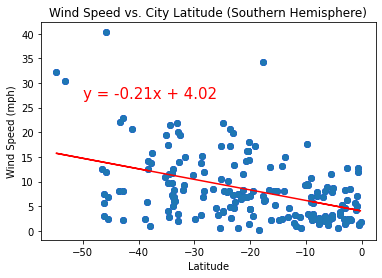

In [24]:
# Get subset of clean data for Southern Hemisphere

clean_data_south = cities_df[(cities_df["Lat"] < 0)] 

x_values = clean_data_south["Lat"].values
y_values = clean_data_south["Wind Speed"].values

plt.scatter(x_values, y_values,color="blue")
plt.title("Wind Speed vs. City Latitude (Southern Hemisphere)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,27),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig('../images/figure12.png')

plt.show()

In [25]:
# The two Plots above are scatter plots showing the relationship beween Wind speed and Latitude
# Even after splitting the data by hemisphere, the correlation between wind speed and latitude is still very 
# weak in both hemispheres.

Three Key observations.

1. The original scatter plot for temparature vs latitude made it very clear that the data should be divided by 
    hemisphere in order to attempt any meaning regression/correlation analysis. This is simply due to the
    southern latitudes having negative. One could have taken an alternate approach and simply use the absolute
    value of latitude instead. However, this would have blended the data and we would not have seen the 
    surprising result mentioned in observation 2 below. 
    
2. The correlation coeficient (r^2) for temperature vs latitude was MUCH higher in the northern hemisphere than
    the southern hemisphere. This suggests a stronger relationship between latitude and temperature in the 
    north. This was not entirely expected. 
    
3. The correlation between cloudiness and latitude appeared to be much stronger in the southern hemisphere than
    in the northern hemisphere. While I wouldn't characterize either as having a strong correlation, the r^2 value
    in the southern hemisphere was noticeably higher, .3283 vs .0428. 
    
    